In [1]:
# !pip install pydicom

In [2]:
import pydicom as dicom
import os
import cv2
import glob2
import numpy as np
from tqdm import tqdm
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


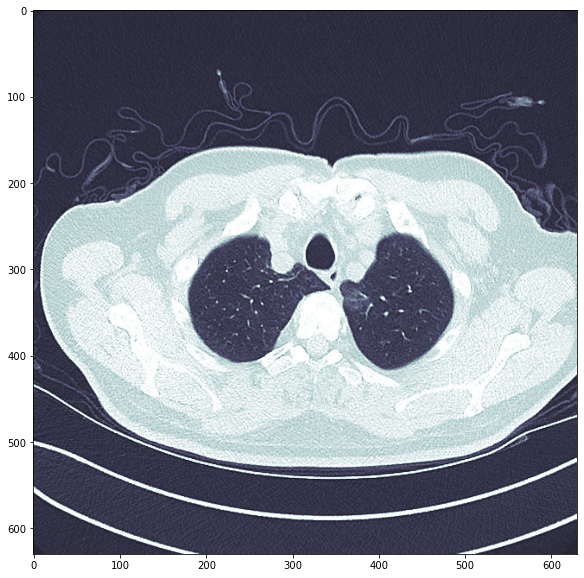

In [3]:
def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

file_path = r'D:\YSC2023\Implementation\Dataset\COVID\Covid\radiopaedia_27_86410_0_53.dcm'
dataset = dicom.dcmread(file_path)
plot_pixel_array(dataset)

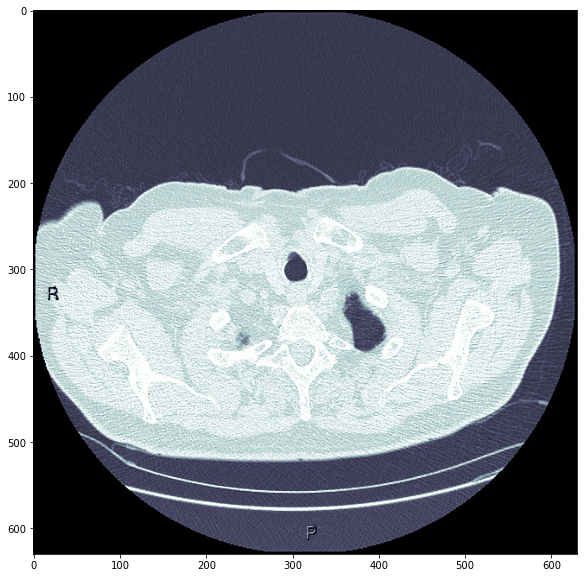

In [4]:
file_path = r'D:\YSC2023\Implementation\Dataset\COVID\Covid\1_1.dcm'
dataset = dicom.dcmread(file_path)
plot_pixel_array(dataset)

In [5]:
folder_covid = r'D:\YSC2023\Implementation\Dataset\COVID'
folder_nonCovid = r'D:\YSC2023\Implementation\Dataset\NONCOVID'
folder_covid_png = r'D:\YSC2023\Implementation\Dataset_PNG\COVID'
folder_nonCovid_png = r'D:\YSC2023\Implementation\Dataset_PNG\NONCOVID'
dataset_path = r"D:\YSC2023\Implementation\Dataset_PNG"

In [6]:
def convert_dicom_png (in_folder, out_folder):
    lower = -1200
    upper = 100
    for filename in tqdm(os.listdir(in_folder)):
        ds = dicom.dcmread(os.path.join(in_folder, filename))
        image = (ds.pixel_array).astype('float32')
        if np.amax(image) == 1:
            image[image!=1] = 0
            image[image==1] = 255
        elif np.amax(image) != 255 and np.amin(image) != 0:
            image[image < lower] = lower
            image[image > upper] = upper
            image = image - lower
            image = image / (upper - lower)
            image = (image * 255)
        filename_out = filename.replace(".dcm", ".png")
        cv2.imwrite(os.path.join(out_folder, filename_out), image)

In [7]:
def generate_train_validation_test_set(covid_path, normal_path, datset_path):
    train_ratio = 0.65
    validation_ratio = 0.20
    test_ratio = 0.15

    images_covid = glob2.glob(os.path.join(os.path.join(covid_path, "Covid"), "*.png"))
    images_normal = glob2.glob(os.path.join(os.path.join(normal_path, "Normal"), "*.png"))
    images_cap = glob2.glob(os.path.join(os.path.join(normal_path, "CAP"), "*.png"))

    covid_length = len(images_covid)
    normal_length = len(images_normal)
    cap_length = len(images_cap)
    print(covid_length, normal_length, cap_length)

    covid_train_end_idx = int(covid_length * train_ratio) - 1 
    covid_validation_end_idx = int(covid_length * (train_ratio + validation_ratio)) - 1
    normal_train_end_idx = int(normal_length * train_ratio) - 1
    normal_validation_end_idx = int(normal_length * (train_ratio + validation_ratio)) - 1
    cap_train_end_idx = int(cap_length * train_ratio) - 1 
    cap_validation_end_idx = int(cap_length * (train_ratio + validation_ratio)) - 1

    np.random.shuffle(images_covid)
    np.random.shuffle(images_normal)
    np.random.shuffle(images_cap)


    # covid
    with open(os.path.join(datset_path, "covid_train.txt"), "w") as f:
        for line in images_covid[:covid_train_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "covid_validation.txt"), "w") as f:
        for line in images_covid[covid_train_end_idx:covid_validation_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "covid_test.txt"), "w") as f:
        for line in images_covid[covid_validation_end_idx:]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    # normal
    with open(os.path.join(datset_path, "normal_train.txt"), "w") as f:
        for line in images_normal[:normal_train_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "normal_validation.txt"), "w") as f:
        for line in images_normal[normal_train_end_idx:normal_validation_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "normal_test.txt"), "w") as f:
        for line in images_normal[normal_validation_end_idx:normal_length]:
            f.write(os.path.basename(line)+'\n')
    f.close()
    
     # cap
    with open(os.path.join(datset_path, "cap_train.txt"), "w") as f:
        for line in images_cap[:cap_train_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "cap_validation.txt"), "w") as f:
        for line in images_cap[cap_train_end_idx:cap_validation_end_idx]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

    with open(os.path.join(datset_path, "cap_test.txt"), "w") as f:
        for line in images_cap[cap_validation_end_idx:cap_length]:
            f.write(os.path.basename(line)+'\n')
    f.close() 

In [8]:
convert_dicom_png(os.path.join(folder_covid, "Covid"), os.path.join(folder_covid_png, "Covid"))
convert_dicom_png(os.path.join(folder_covid, "Covid_LungMask"), os.path.join(folder_covid_png, "Covid_LungMask"))
convert_dicom_png(os.path.join(folder_covid, "Covid_LesionMask"), os.path.join(folder_covid_png, "Covid_LesionMask"))
  
convert_dicom_png(os.path.join(folder_nonCovid, "Normal"), os.path.join(folder_nonCovid_png, "Normal"))
convert_dicom_png(os.path.join(folder_nonCovid, "Normal_LungMask"), os.path.join(folder_nonCovid_png, "Normal_LungMask"))

convert_dicom_png(os.path.join(folder_nonCovid, "CAP"), os.path.join(folder_nonCovid_png, "CAP"))
convert_dicom_png(os.path.join(folder_nonCovid, "CAP_LungMask"), os.path.join(folder_nonCovid_png, "CAP_LungMask"))

generate_train_validation_test_set(folder_covid_png, folder_nonCovid_png, dataset_path)

100%|██████████████████████████████████████████████████████████████████████████████| 7673/7673 [01:50<00:00, 69.54it/s]


3100 12562 7673
